In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')

# 1. Loading Data

In [ ]:
url = '../../Data/d2/diabetes_012_health_indicators_BRFSS2021.csv'
url = glob.glob(url)[0]
df = pd.read_csv(url)
df = df.rename(columns={'Diabetes_012': 'Class'})
for i in df.columns:
    if i != 'BMI':
        df[i] = df[i].astype(int)
df.drop_duplicates(inplace=True)
df['Class'].value_counts()

,count
Class,
0,184542
2,33395
1,5613


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223550 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Class                 223550 non-null  int64  
 1   HighBP                223550 non-null  int64  
 2   HighChol              223550 non-null  int64  
 3   CholCheck             223550 non-null  int64  
 4   BMI                   223550 non-null  float64
 5   Smoker                223550 non-null  int64  
 6   Stroke                223550 non-null  int64  
 7   HeartDiseaseorAttack  223550 non-null  int64  
 8   PhysActivity          223550 non-null  int64  
 9   Fruits                223550 non-null  int64  
 10  Veggies               223550 non-null  int64  
 11  HvyAlcoholConsump     223550 non-null  int64  
 12  AnyHealthcare         223550 non-null  int64  
 13  NoDocbcCost           223550 non-null  int64  
 14  GenHlth               223550 non-null  int64  
 15  MentH

In [ ]:
categories_cols = [i for i in df.select_dtypes(include='int64').columns
                   if i not in ['Class', 'MentHlth', 'PhysHlth']]

for col in categories_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223550 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Class                 223550 non-null  int64   
 1   HighBP                223550 non-null  category
 2   HighChol              223550 non-null  category
 3   CholCheck             223550 non-null  category
 4   BMI                   223550 non-null  float64 
 5   Smoker                223550 non-null  category
 6   Stroke                223550 non-null  category
 7   HeartDiseaseorAttack  223550 non-null  category
 8   PhysActivity          223550 non-null  category
 9   Fruits                223550 non-null  category
 10  Veggies               223550 non-null  category
 11  HvyAlcoholConsump     223550 non-null  category
 12  AnyHealthcare         223550 non-null  category
 13  NoDocbcCost           223550 non-null  category
 14  GenHlth               223550 non-null  ca

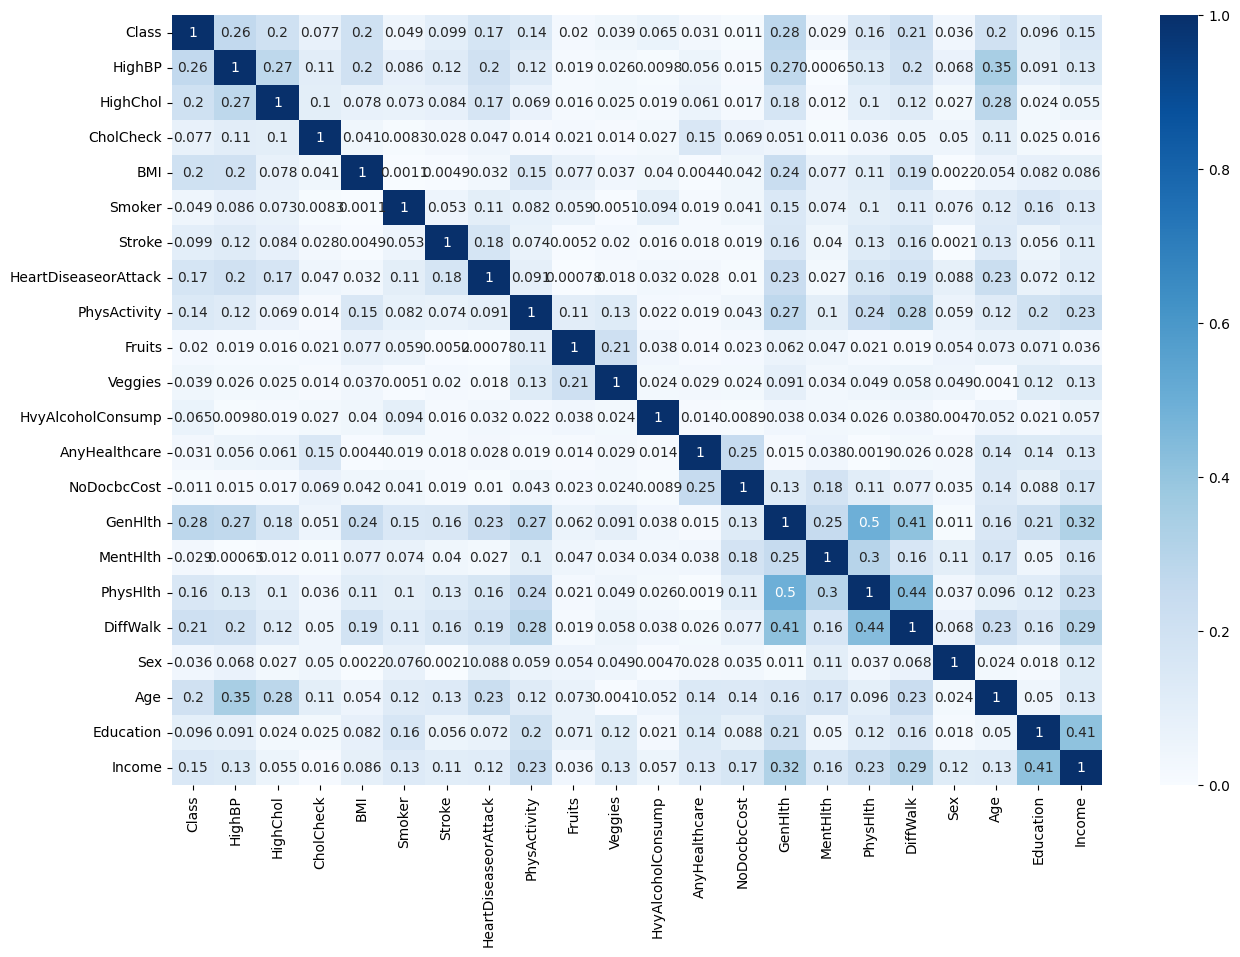

In [ ]:
corr = np.abs(df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmax = 1, vmin = 0)
plt.show()

# 3. Drop Outliers

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
model = LocalOutlierFactor(n_neighbors=2)
df['anomaly']= model.fit_predict(df)
df = df[df['anomaly'] == 1]
df.drop('anomaly', axis=1, inplace=True)
df

,Class,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,15.0,1,0,0,0,1,...,1,0,5,10,20,0,0,11,4,5
1,2,1,0,1,28.0,0,0,1,0,1,...,1,0,2,0,0,0,0,11,4,3
2,2,1,1,1,33.0,0,0,0,1,1,...,1,0,2,10,0,0,0,9,4,7
3,2,0,1,1,29.0,0,1,1,1,1,...,1,0,5,0,30,1,1,12,3,4
4,0,0,0,1,24.0,1,0,0,0,0,...,1,0,3,0,0,1,1,13,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2,1,1,1,21.0,0,0,0,1,1,...,1,0,4,0,0,0,1,10,2,3
236374,0,1,0,1,25.0,1,0,0,1,1,...,0,1,2,20,0,0,0,3,4,5
236375,0,0,1,1,31.0,0,0,0,1,1,...,1,0,2,0,0,0,1,7,6,10
236376,0,1,0,1,24.0,0,0,0,1,1,...,1,0,2,0,0,0,1,10,4,6


In [ ]:
df['Class'].value_counts().sort_index()

,count
Class,
0,181208
1,5368
2,32975


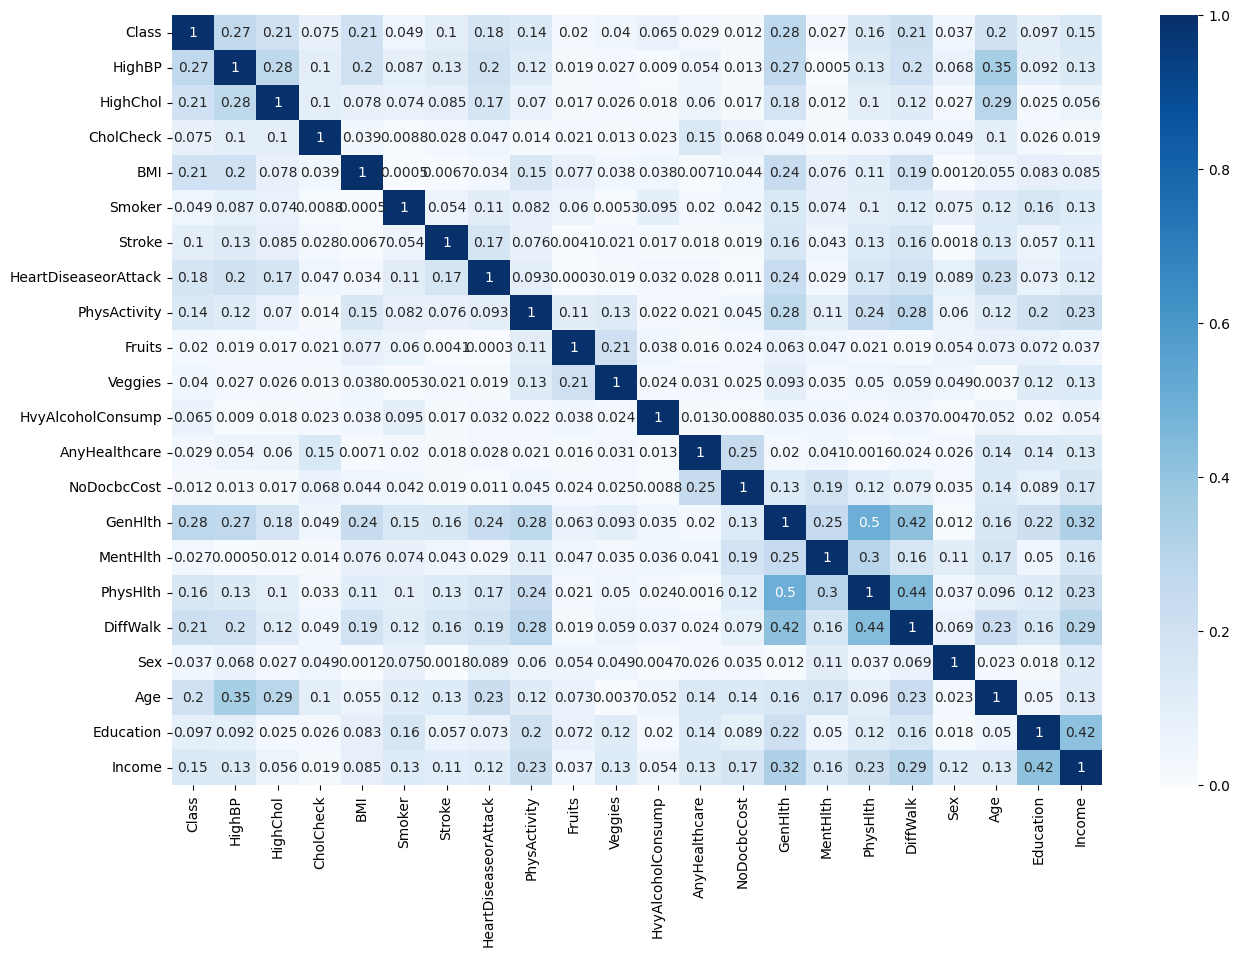

In [ ]:
corr = np.abs(df.corr())
corr = np.round(corr, 4)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmax = 1, vmin = 0)
plt.show()

# 4. Save Data

In [ ]:
url = glob.glob('../../Data/d2')[0]
url = url+'/diabetes_012_health_indicators_BRFSS2021_cleaned.csv'
df.to_csv(url, index=False)